<h1>Linear Breast Cancer Classifier</h1>
<p>This notebook create a model that can classify breast cancer. The dataset used in this notebook is <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29" target="blank">Breast Cancer Wisconsin (Diagnostic) Data Set</a>. The dataset also available on <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data" target="blank">kaggle</a> in csv format. In this notebook, there are several steps performed in order to make a classification model and trained it using encrypted data:</p>
<ol>
    <li>Import libraries</li>
    <li>Load dataset</li>
    <li>Drop unnecessary columns</li>
    <li>Convert categorical into numerical (for classification purpose)</li>
    <li>Plotting Correlation matrix for picking attribute (Intuition and Visualization Purpose)</li>
    <li>Plotting Scatter plot for two selected attribute (Intuition and Visualization Purpose)</li>
    <li>Split dataset and train classification model</li>
    <li>Test on unencrypted data</li>
    <li>Test on Encrypted Data</li>
    <li>Repeat step 7 to 9 using all attribute</li>
</ol>

<h2>Import Libraries</h2>
<ul>
    <li><a href="https://pypi.org/project/numpy/" target="blank">Numpy</a> for array computation</li>
    <li><a href="https://pypi.org/project/pandas/" target="blank">Pandas</a> for read and store dataset in dataframe</li>
    <li><a href="https://pypi.org/project/matplotlib/" target="blank">Matplotlib</a> for plotting</li>
    <li><a href="https://pypi.org/project/seaborn/" target="blank">Seaborn</a> for plotting in different way</li>
    <li><a href="https://pypi.org/project/scikit-learn/" target="blank">Scikit-Learn</a> for machine learning</li>
    <li><a href="https://pypi.org/project/phe/" target="blank">PHE</a> for Partially Homomorphic Encryption</li>
    <li><a href="https://pypi.org/project/tqdm/" target="blank">TQDM</a> for track looping progress</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from phe import paillier
from tqdm import tqdm_notebook as tn

<h2>Load Dataset</h2>

In [2]:
df = pd.read_csv("../inputs/dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

<h2>Drop Unnecessary columns</h2>

In [3]:
df = df.drop(["Unnamed: 32"], axis = 1)
df_id = df['id']
df = df.drop(['id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

<h2>Convert categorical into numerical (for classification purpose)</h2>

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

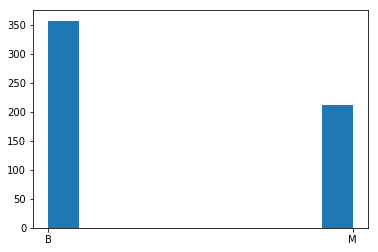

In [4]:
plt.hist(df["diagnosis"])

In [5]:
df = df.replace(["B", "M"], [0, 1])

<h2>Plotting Correlation matrix for picking attribute (Intuition and Visualization Purpose)</h2>

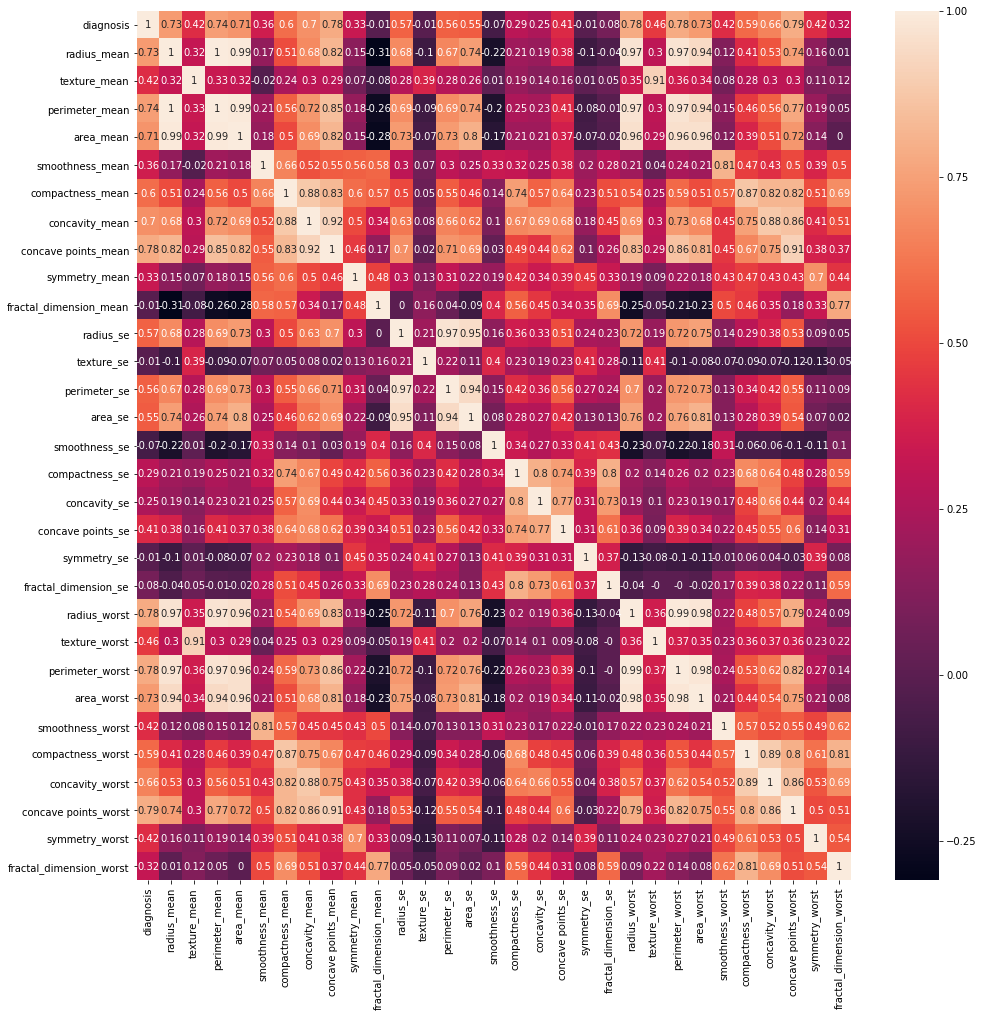

In [6]:
corr_matrix = df.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True)

In [7]:
corr_matrix["diagnosis"].sort_values()

smoothness_se             -0.07
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
fractal_dimension_se       0.08
concavity_se               0.25
compactness_se             0.29
fractal_dimension_worst    0.32
symmetry_mean              0.33
smoothness_mean            0.36
concave points_se          0.41
texture_mean               0.42
symmetry_worst             0.42
smoothness_worst           0.42
texture_worst              0.46
area_se                    0.55
perimeter_se               0.56
radius_se                  0.57
compactness_worst          0.59
compactness_mean           0.60
concavity_worst            0.66
concavity_mean             0.70
area_mean                  0.71
area_worst                 0.73
radius_mean                0.73
perimeter_mean             0.74
concave points_mean        0.78
radius_worst               0.78
perimeter_worst            0.78
concave points_worst       0.79
diagnosis                  1.00
Name: di

In [8]:
corr_matrix["concave points_worst"].sort_values()

texture_se                -0.12
smoothness_se             -0.10
symmetry_se               -0.03
fractal_dimension_mean     0.18
fractal_dimension_se       0.22
texture_mean               0.30
texture_worst              0.36
symmetry_mean              0.43
concavity_se               0.44
compactness_se             0.48
smoothness_mean            0.50
symmetry_worst             0.50
fractal_dimension_worst    0.51
radius_se                  0.53
area_se                    0.54
perimeter_se               0.55
smoothness_worst           0.55
concave points_se          0.60
area_mean                  0.72
radius_mean                0.74
area_worst                 0.75
perimeter_mean             0.77
radius_worst               0.79
diagnosis                  0.79
compactness_worst          0.80
perimeter_worst            0.82
compactness_mean           0.82
concavity_mean             0.86
concavity_worst            0.86
concave points_mean        0.91
concave points_worst       1.00
Name: co

In [9]:
corr_matrix["radius_worst"].sort_values()

fractal_dimension_mean    -0.25
smoothness_se             -0.23
symmetry_se               -0.13
texture_se                -0.11
fractal_dimension_se      -0.04
fractal_dimension_worst    0.09
symmetry_mean              0.19
concavity_se               0.19
compactness_se             0.20
smoothness_mean            0.21
smoothness_worst           0.22
symmetry_worst             0.24
texture_mean               0.35
concave points_se          0.36
texture_worst              0.36
compactness_worst          0.48
compactness_mean           0.54
concavity_worst            0.57
concavity_mean             0.69
perimeter_se               0.70
radius_se                  0.72
area_se                    0.76
diagnosis                  0.78
concave points_worst       0.79
concave points_mean        0.83
area_mean                  0.96
perimeter_mean             0.97
radius_mean                0.97
area_worst                 0.98
perimeter_worst            0.99
radius_worst               1.00
Name: ra

<h2>Plotting Scatter plot for two selected attribute (Intuition and Visualization Purpose)</h2>

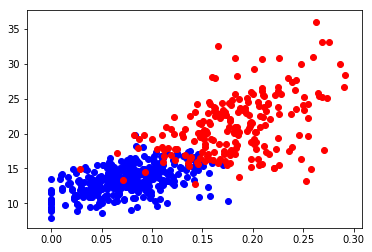

In [10]:
df_label_B = df.where(df["diagnosis"] == 0)
df_label_M = df.where(df["diagnosis"] == 1)
plt.scatter(df_label_B["concave points_worst"], df_label_B["radius_worst"], color="blue")
plt.scatter(df_label_M["concave points_worst"], df_label_M["radius_worst"], color="red")

<h2>Split dataset and train classification model</h2>

In [11]:
X = np.array(df[["concave points_worst", "radius_worst"]])
y = np.array(df["diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

<h2>Test on unencrypted data</h2>

In [12]:
clf.score(X_test, y_test)

0.8811188811188811

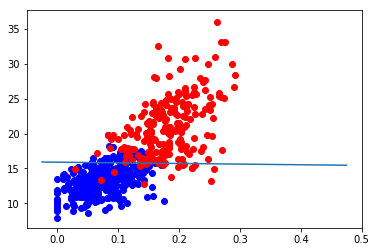

In [13]:
colors = ['blue', 'red']

x_min, x_max = X[:, 0].min() - .025, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
ys = (-clf.intercept_[0]-xs*clf.coef_[0,0])/clf.coef_[0,1]
plt.plot(xs,ys)
for i in range(len(colors)):
    px = X[:, 0][y == i]
    py = X[:, 1][y == i]
    plt.scatter(px, py, c=colors[i])

In [14]:
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=["B", "M"]))

             precision    recall  f1-score   support

          B       0.94      0.87      0.90        89
          M       0.80      0.91      0.85        54

avg / total       0.89      0.88      0.88       143



<h2>Test on Encrypted Data</h2>

In [15]:
public_key, private_key = paillier.generate_paillier_keypair()

In [16]:
enc_X_test = [[public_key.encrypt(i[0]),public_key.encrypt(i[1])] for i in tn(X_test)]

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [17]:
enc_mapping = [i[0]*clf.coef_[0,0] + i[1]*clf.coef_[0,1] for i in tn(enc_X_test)]

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [18]:
dec_mapping = [private_key.decrypt(i) for i in tn(enc_mapping)]

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [19]:
y_pred = [0 if i < -clf.intercept_[0] else 1 for i in dec_mapping]

y_pred = np.array(y_pred)

In [20]:
print(metrics.classification_report(y_test, y_pred, target_names=["B", "M"]))

             precision    recall  f1-score   support

          B       0.94      0.87      0.90        89
          M       0.80      0.91      0.85        54

avg / total       0.89      0.88      0.88       143



<h2>Repeat step 7 to 9 using all attribute</h2>

In [25]:
X = np.array(df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]])
y = np.array(df["diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [26]:
clf.score(X_test, y_test)

0.951048951048951

In [27]:
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=["B", "M"]))

             precision    recall  f1-score   support

          B       0.97      0.96      0.96        94
          M       0.92      0.94      0.93        49

avg / total       0.95      0.95      0.95       143



In [28]:
enc_X_test = [[public_key.encrypt(j) for j in i] for i in tn(X_test)]

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [29]:
enc_mapping = list()
for i in tn(enc_X_test):
    tot = 0
    for j in range(len(i)):
        tot += i[j] * clf.coef_[0,j]
    enc_mapping.append(tot)

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [30]:
dec_mapping = [private_key.decrypt(i) for i in tn(enc_mapping)]

HBox(children=(IntProgress(value=0, max=143), HTML(value='')))

In [31]:
y_pred = [0 if i < -clf.intercept_[0] else 1 for i in dec_mapping]

y_pred = np.array(y_pred)

In [32]:
print(metrics.classification_report(y_test, y_pred, target_names=["B", "M"]))

             precision    recall  f1-score   support

          B       0.97      0.96      0.96        94
          M       0.92      0.94      0.93        49

avg / total       0.95      0.95      0.95       143

